In [2]:
import numpy as np
import pycbc.waveform as pycbc_wf
import bilby
import pycbc
import matplotlib.pyplot as plt
import logging

/nasdata1/ashwin.girish/miniconda3/envs/ringdown/lib/python3.10/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/nasdata1/ashwin.girish/miniconda3/envs/ringdown/lib/python3.10/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [36]:
def trial_model_time(time_array, mass_1, mass_2, luminosity_distance, theta_jn, phase,
         a_1, a_2, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0, 
         **waveform_kwargs):
    """ Modelling the inspital part of the waveform in time domain """
    
    start_frequency = minimum_frequency = waveform_kwargs.get('minimum_frequency', 20.0)
    #maximum_frequency = waveform_kwargs.get('maximum_frequency', frequency_array[-1])
    reference_frequency = waveform_kwargs.get('reference_frequency', 50.0)
    
    start_time = minimum_time = waveform_kwargs.get('minimum_time', time_array[0])
    end_time = maximum_time = waveform_kwargs.get('maximum_time', time_array[-1])
    
    waveform_dictionary = dict(spin_order=-1, tidal_order=-1,
        phase_order=-1, amplitude_order=0)
    
    m1 = mass_1 * bilby.core.utils.solar_mass
    m2 = mass_2 * bilby.core.utils.solar_mass
    
    iota, spin_1x, spin_1y, spin_1z, spin_2x, spin_2y, spin_2z = bilby.gw.conversion.bilby_to_lalsimulation_spins(
        theta_jn=theta_jn, phi_jl=phi_jl, tilt_1=tilt_1, tilt_2=tilt_2,
        phi_12=phi_12, a_1=a_1, a_2=a_2, mass_1=m1, mass_2=m2,
        reference_frequency=reference_frequency, phase=phase)
    
    longitude_ascending_nodes = 0.0
    mean_per_ano = 0.0
    
    hpt, hct = pycbc.waveform.get_td_waveform(approximant="TaylorT2",
                                        mass1=mass_1,
                                 mass2=mass_2,
                                 a1= a_1, a2= a_2,
                                 delta_t=1.0/2048,
                                 f_lower=20)
    
    h_plus = np.zeros_like(time_array, dtype=complex)
    h_cross = np.zeros_like(time_array, dtype=complex)
    
    if len(hpt.data.data) > len(time_array):
        h_plus = hpt.data.data[:len(h_plus)]
        h_cross = hct.data.data[:len(h_cross)]
    else:
        h_plus[-len(hpt.data.data):] = hpt.data.data
        h_cross[-len(hct.data.data):] = hct.data.data
   

    return h_plus

In [37]:
np.array(trial_model_time(np.arange(1,100,1),30, 30, 400, 0, 1.3,
        0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))

array([ 1.89959619e-19,  1.91006759e-19,  1.91333987e-19,  1.90939441e-19,
        1.89823982e-19,  1.87991199e-19,  1.85447384e-19,  1.82201539e-19,
        1.78265317e-19,  1.73653006e-19,  1.68381475e-19,  1.62470085e-19,
        1.55940683e-19,  1.48817449e-19,  1.41126866e-19,  1.32897594e-19,
        1.24160375e-19,  1.14947908e-19,  1.05294766e-19,  9.52372027e-20,
        8.48130710e-20,  7.40616849e-20,  6.30236233e-20,  5.17406283e-20,
        4.02553983e-20,  2.86114949e-20,  1.68531243e-20,  5.02497282e-21,
       -6.82792821e-21, -1.86604255e-20, -3.04273458e-20, -4.20837248e-20,
       -5.35849902e-20, -6.48870490e-20, -7.59465618e-20, -8.67210227e-20,
       -9.71690047e-20, -1.07250225e-19, -1.16925795e-19, -1.26158297e-19,
       -1.34911986e-19, -1.43152888e-19, -1.50848952e-19, -1.57970201e-19,
       -1.64488781e-19, -1.70379145e-19, -1.75618119e-19, -1.80184992e-19,
       -1.84061623e-19, -1.87232486e-19, -1.89684761e-19, -1.91408365e-19,
       -1.92396017e-19, -

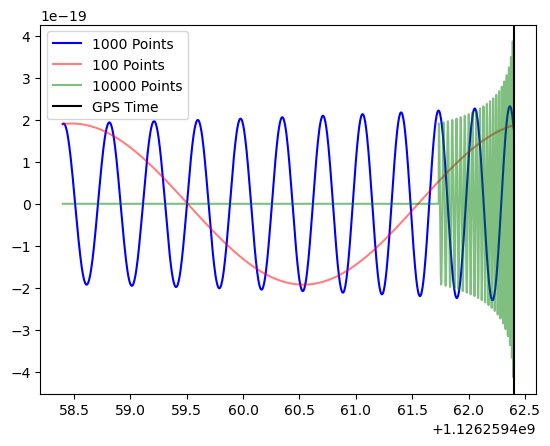

In [38]:
tg = 1126259462.4
t = np.linspace(tg-4,tg,1000)
model = np.array(trial_model_time(t,30, 30, 400, 0, 1.3,
         0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))
t1 = np.linspace(tg-4,tg,100)
model1 = np.array(trial_model_time(t1,30, 30, 400, 0, 1.3,
          0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))
t2 = np.linspace(tg-4,tg,10000)
model2 = np.array(trial_model_time(t2,30, 30, 400, 0, 1.3,
          0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))
plt.plot(t,model,color='b',label='1000 Points')
plt.plot(t1,model1,color='r',label='100 Points',alpha=0.5)
plt.plot(t2,model2,color='g',label='10000 Points',alpha=0.5)
plt.axvline(tg,color='k',label='GPS Time')
plt.legend()
plt.show()

In [39]:
np.array(trial_model_time(t,30, 30, 400, 0, 1.3,
        0.3, 0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0))[:200]

array([ 1.89959619e-19,  1.91006759e-19,  1.91333987e-19,  1.90939441e-19,
        1.89823982e-19,  1.87991199e-19,  1.85447384e-19,  1.82201539e-19,
        1.78265317e-19,  1.73653006e-19,  1.68381475e-19,  1.62470085e-19,
        1.55940683e-19,  1.48817449e-19,  1.41126866e-19,  1.32897594e-19,
        1.24160375e-19,  1.14947908e-19,  1.05294766e-19,  9.52372027e-20,
        8.48130710e-20,  7.40616849e-20,  6.30236233e-20,  5.17406283e-20,
        4.02553983e-20,  2.86114949e-20,  1.68531243e-20,  5.02497282e-21,
       -6.82792821e-21, -1.86604255e-20, -3.04273458e-20, -4.20837248e-20,
       -5.35849902e-20, -6.48870490e-20, -7.59465618e-20, -8.67210227e-20,
       -9.71690047e-20, -1.07250225e-19, -1.16925795e-19, -1.26158297e-19,
       -1.34911986e-19, -1.43152888e-19, -1.50848952e-19, -1.57970201e-19,
       -1.64488781e-19, -1.70379145e-19, -1.75618119e-19, -1.80184992e-19,
       -1.84061623e-19, -1.87232486e-19, -1.89684761e-19, -1.91408365e-19,
       -1.92396017e-19, -